In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("USA_Housing.csv")

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
# Missing value
df.isnull().sum()


Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

<Axes: ylabel='Avg. Area Income'>

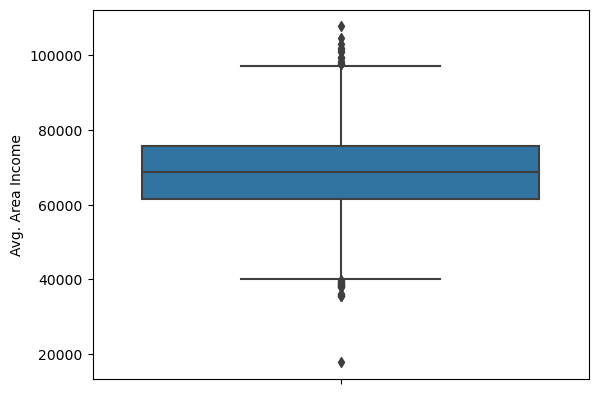

In [7]:
# Outlier
sns.boxplot(y = 'Avg. Area Income', data = df)

<Axes: ylabel='Avg. Area House Age'>

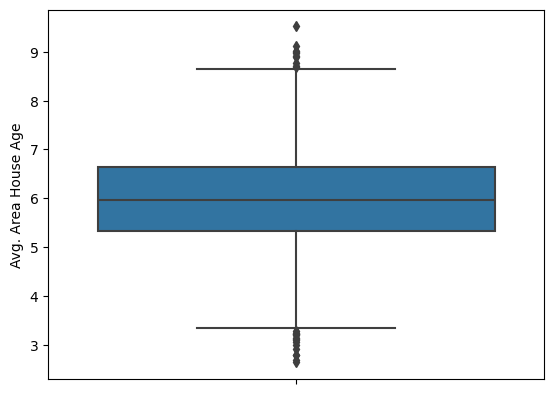

In [8]:
sns.boxplot(y = 'Avg. Area House Age', data = df)

<Axes: ylabel='Avg. Area Number of Rooms'>

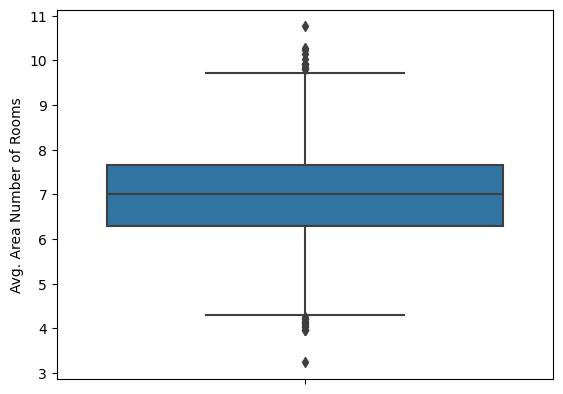

In [9]:
sns.boxplot(y = 'Avg. Area Number of Rooms', data = df)

<Axes: ylabel='Avg. Area Number of Bedrooms'>

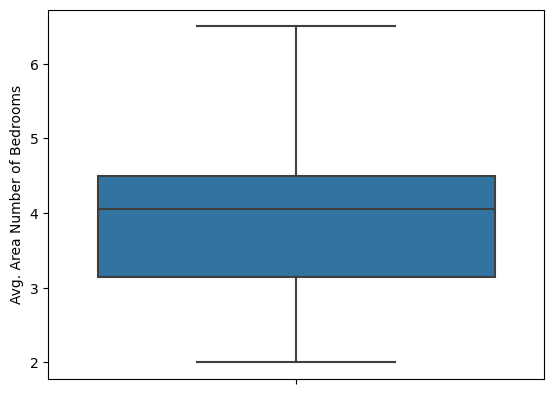

In [10]:
sns.boxplot(y = 'Avg. Area Number of Bedrooms', data = df)

<Axes: ylabel='Area Population'>

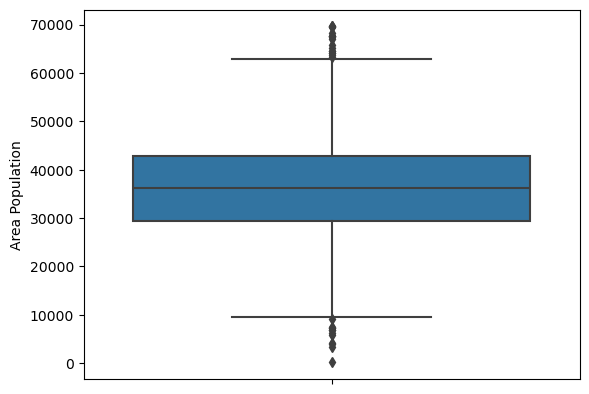

In [11]:
sns.boxplot(y = 'Area Population', data = df)

In [12]:
df = df.drop('Address' , axis=1)

In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
pos_outlier = Q3+1.5*IQR
neg_outlier = Q1-1.5*IQR

In [14]:
print(Q1)
print("*******************************")
print(Q3)
print('*******************************')
print(IQR)
print('********************************')
print(pos_outlier)
print('********************************')
print(neg_outlier)

Avg. Area Income                 61480.562388
Avg. Area House Age                  5.322283
Avg. Area Number of Rooms            6.299250
Avg. Area Number of Bedrooms         3.140000
Area Population                  29403.928702
Price                           997577.135049
Name: 0.25, dtype: float64
*******************************
Avg. Area Income                7.578334e+04
Avg. Area House Age             6.650808e+00
Avg. Area Number of Rooms       7.665871e+00
Avg. Area Number of Bedrooms    4.490000e+00
Area Population                 4.286129e+04
Price                           1.471210e+06
Name: 0.75, dtype: float64
*******************************
Avg. Area Income                 14302.776278
Avg. Area House Age                  1.328525
Avg. Area Number of Rooms            1.366621
Avg. Area Number of Bedrooms         1.350000
Area Population                  13457.362067
Price                           473633.069163
dtype: float64
********************************
Avg. Area In

In [15]:
df = df[~((df < (Q1-1.5 *IQR)) | (df > (Q3+1.5 * IQR))).any(axis=1)]

In [16]:
df.shape

(4865, 6)

In [17]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [18]:
# from pandas_profiling import ProfileReport
# report = ProfileReport(df)
# report.to_file(output_file='output.html')

In [19]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.021102,-0.021113,0.012875,-0.014097,0.632031
Avg. Area House Age,-0.021102,1.000000,-0.016919,0.001177,-0.024151,0.441675
Avg. Area Number of Rooms,-0.021113,-0.016919,1.000000,0.466596,-0.000244,0.329630
Avg. Area Number of Bedrooms,0.012875,0.001177,0.466596,1.000000,-0.023172,0.168606
Area Population,-0.014097,-0.024151,-0.000244,-0.023172,1.000000,0.406027
Price,0.632031,0.441675,0.329630,0.168606,0.406027,1.000000


<Axes: >

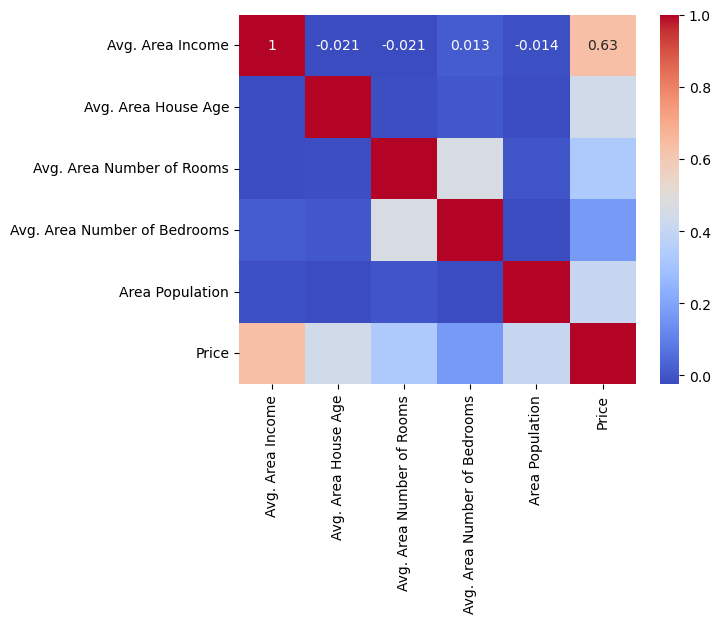

In [20]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

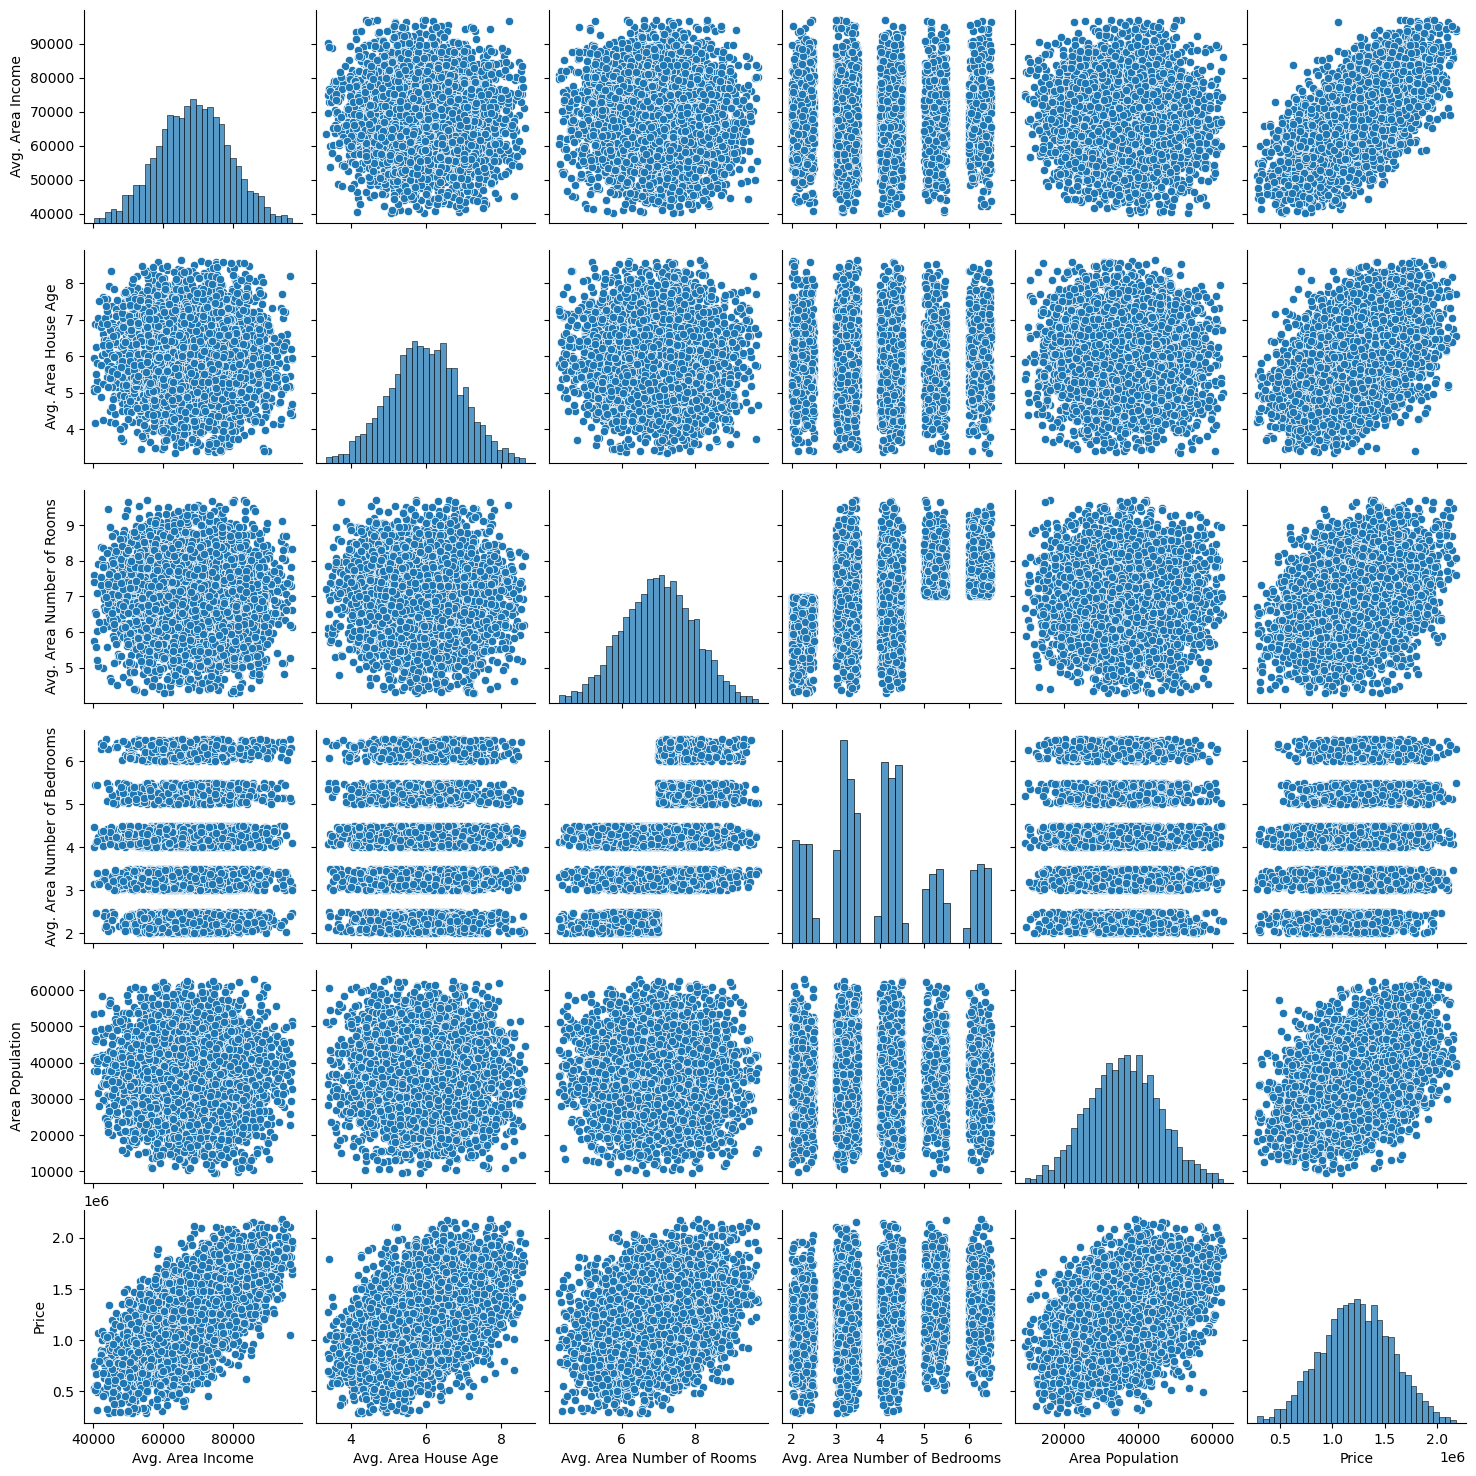

In [21]:
sns.pairplot(data=df)

<Axes: xlabel='Price', ylabel='Density'>

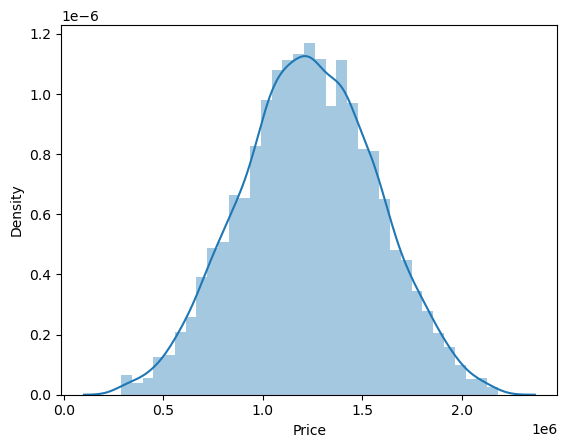

In [22]:
sns.distplot(df['Price'])

In [23]:
x = df.drop(['Price'], axis=1)
y = df['Price']

In [24]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [25]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [26]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_scalar = scalar.fit_transform(x)
x_scalar

array([[ 1.06071779, -0.30363229,  0.02290907,  0.0859644 , -1.35240284],
       [ 1.03191461,  0.02775903, -0.25978767, -0.72371729,  0.4207993 ],
       [-0.7110857 , -0.11411114,  1.5498338 ,  0.92803335,  0.07927052],
       ...,
       [-0.50694938,  1.31970959, -2.2154799 , -1.50101171, -0.29599705],
       [-0.05953013, -0.45737203,  0.14574608,  1.17903467,  0.67532313],
       [-0.30123371,  0.0167887 , -0.1973158 ,  0.06977076,  1.07753698]])

# Varience inflation factor (VIF) - To check the multicolliniarity between Ind and Ind variable
Varience inflation factor is a measure of amount of multicolliniarity in regression Analysis. Multicolliniarity exist when there is a correlation 
between multiple regression model. This can adversily affect the regression result
# VIF = 1/ 1-R^2

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = x_scalar
vif = pd.DataFrame()
vif['features'] = x.columns
vif['Varienc_influence_factor'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]
vif

,features,Varienc_influence_factor
0,Avg. Area Income,1.001776
1,Avg. Area House Age,1.001451
2,Avg. Area Number of Rooms,1.280194
3,Avg. Area Number of Bedrooms,1.280126
4,Area Population,1.001448


In [28]:
# There is no multicollinearity found in the USA Pricing dataset
# Balance steps
# split the data into train and test data set
# Model building
# prediction on train and test data set
# Model evaluation
# check all assumption including p-value and adj r-sqr
# Ridge and Lasso method (Regularisation)

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scalar, y, test_size= 0.2, random_state=101)

In [30]:
x_train

array([[ 0.16767466, -1.47092212,  0.32831775,  1.90774819, -0.11908748],
       [-0.2636713 ,  0.18560489, -0.47376623, -0.78849183,  1.40613587],
       [ 0.1064647 ,  0.10052022,  1.12128984, -0.43223188,  0.01793545],
       ...,
       [ 0.06433506, -0.67701516,  0.22296269,  1.08187287,  2.20946135],
       [-1.27891077, -0.87147414,  0.90938921,  0.91993653, -1.30919326],
       [-1.84510156, -1.54697718, -1.3903798 , -1.54149579, -0.23676161]])

In [31]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(3892, 5) (3892,) (973, 5) (973,)


# Building Linear regression model

In [32]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [33]:
print("y intercept", lr_model.intercept_)
print("coefficient", lr_model.coef_)

y intercept 1231546.4222016977
coefficient [221451.47324951 159855.55949133 118223.10907834   2338.16791724
 144936.29820984]


In [34]:
# predict the model with test data
y_pred = lr_model.predict(x_test)
y_pred

array([1295727.48389608, 1511627.8318256 , 1089947.45818296,
       1260816.08578785,  732549.14328085, 1156990.82758262,
        630890.16480409, 1443974.81209123, 1512063.84312365,
       1312115.04781852,  685541.13066426,  714702.05542563,
       1492285.00846233, 1543032.3698837 ,  871913.91439112,
       1199362.25231059,  514849.4718123 , 1416178.60410161,
       1770594.45393818, 1144185.69820404,  826296.51470221,
        835860.36843604, 1807774.45569579, 1193307.57667004,
       1397886.05858382,  951985.51691421, 2119609.79881099,
       1553958.0994748 , 1051306.99367813,  741920.12773196,
       1196766.73784174, 1412494.76334343, 1473099.57681814,
        735787.23473316,  829303.6670138 ,  909407.64541576,
        954033.38547836,  748220.89713461, 1622101.10888303,
        832360.99729008, 1392932.76584763, 1007344.77436047,
       1485020.98017685, 1235537.19109041,  801240.18360139,
       1291454.25855617,  952539.29845827,  592385.86828971,
        724050.99857781,

In [35]:
# Evaluation metrics to find accuracy or r-squre value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9115881442182843

In [37]:
# Building OLS (Ordinary Least Squre) Method
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.3, random_state=121)

In [38]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [39]:
reg_model= smf.OLS(endog= y_train1, exog=x_train1).fit()

In [40]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                          1.987e+04
Date:                Sat, 08 Jun 2024   Prob (F-statistic):                        0.00
Time:                        20:18:19   Log-Likelihood:                         -46884.
No. Observations:                3405   AIC:                                  9.378e+04
Df Residuals:                    3400   BIC:                                  9.381e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Avg. Area Income                10.0604      0.316     31.835      0.000       9.441      10.680
Avg. Area House Age           5.056e+04   3487.814     14.497      0.000    4.37e+04    5.74e+04
Avg. Area Number of Rooms    -1.067e+04   3847.048     -2.775      0.006   -1.82e+04   -3131.380
Avg. Area Number of Bedrooms  8682.9219   3623.901      2.396      0.017    1577.677    1.58e+04
Area Population                  8.0357      0.388     20.714      0.000       7.275       8.796
==============================================================================
Omnibus:                        9.084   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                7.468
Skew:                          -0.025   Prob(JB):                       0.0239
Kurtosis:                       2.776   Cond. No.                     9.42e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

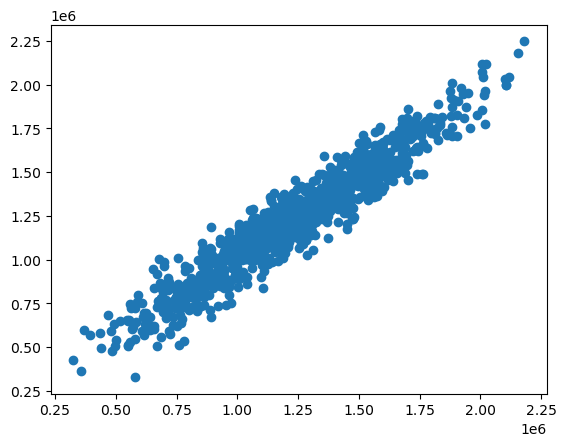

In [41]:
# Check Normality
plt.scatter(y_test, y_pred)

<Axes: xlabel='Price', ylabel='Density'>

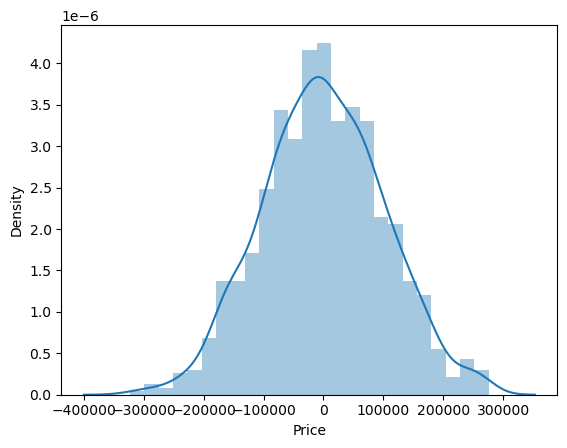

In [43]:
sns.distplot((y_test - y_pred), bins=25)

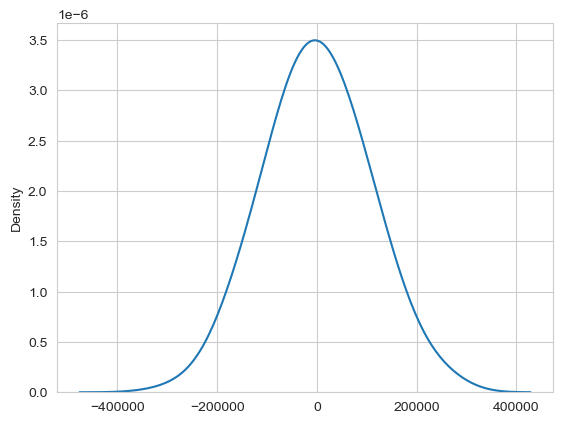

In [44]:
delta = y_test - y_pred
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta), bw=0.5)
plt.show()

In [ ]:
# Adj. R-squred (Uncentred) : 0.967
# p_value = all are statically significant
# Durbin- Watson value = 2.019
# VIF - all are less than 5 so there is no multicolliniarity
# Data is liniar with normality
# there is no endogenity problem
# there is no hetroscadicity